# Plot

In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
import STACCI as st

## Read adata
Read ccci part running results

In [4]:
adata_311_stringent = sc.read_h5ad('../NG-lung/ceco_res/new_res_23.9.22/selfdb_res/stringent/adata_sp311_all_cecov6_stringent_res.h5ad')

## (1) Cell-cell interaction
This section is mainly focused on the interaction between cell types

### A. Network plot

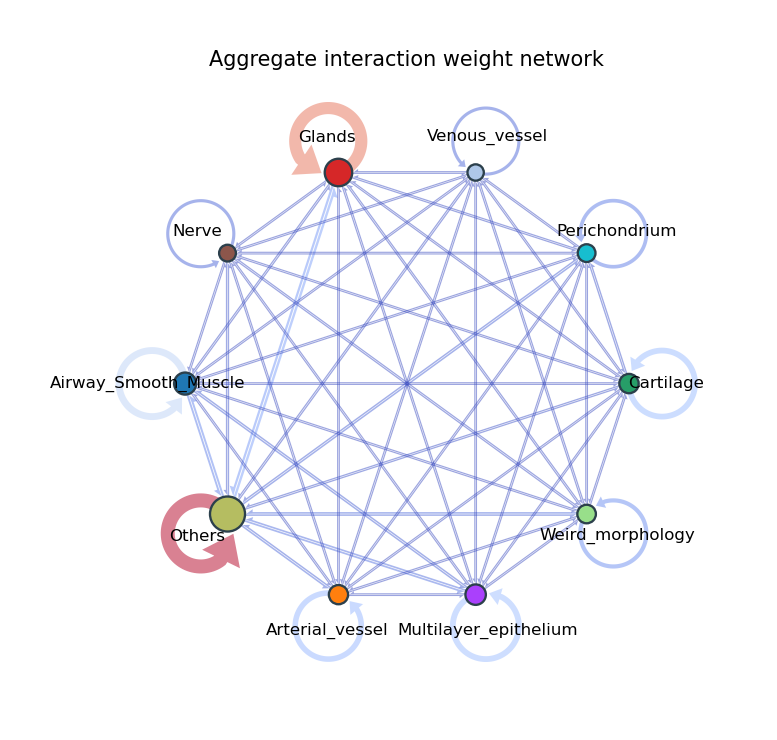

In [3]:
## Users can visualize the overall strength of interactions between cell types (level='all')
## The user can select the type of interaction strength as the sum score of each edge (tp='weight')
st.pl.plot_CCI_network(adata_311_stringent,
                       level='all',
                       tp='weight'
                      )

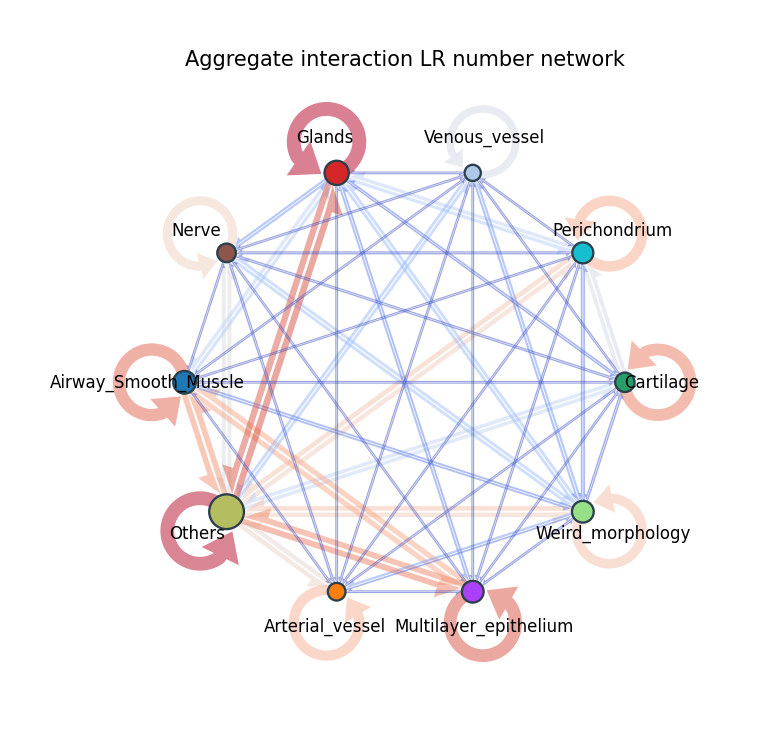

In [5]:
## The user can select to show the number of LRPs (tp='count')
st.pl.plot_CCI_network(adata_311_stringent,
                       level='all',
                       tp='count'
                      )

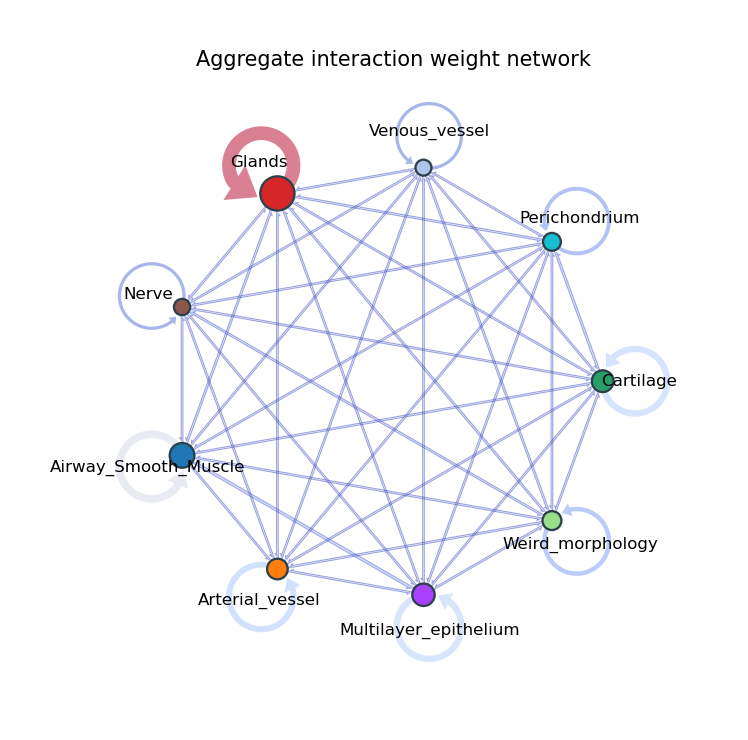

In [4]:
## Users can visualize selected cell types according to their needs
cell_type_show = list(adata_311_stringent.uns['cell_type_list'])
cell_type_show.remove('Others')
st.pl.plot_CCI_network(adata_311_stringent,
                       level='all',
                       tp='weight',
                       ct_list=cell_type_show
                      )

### B. Chord plot

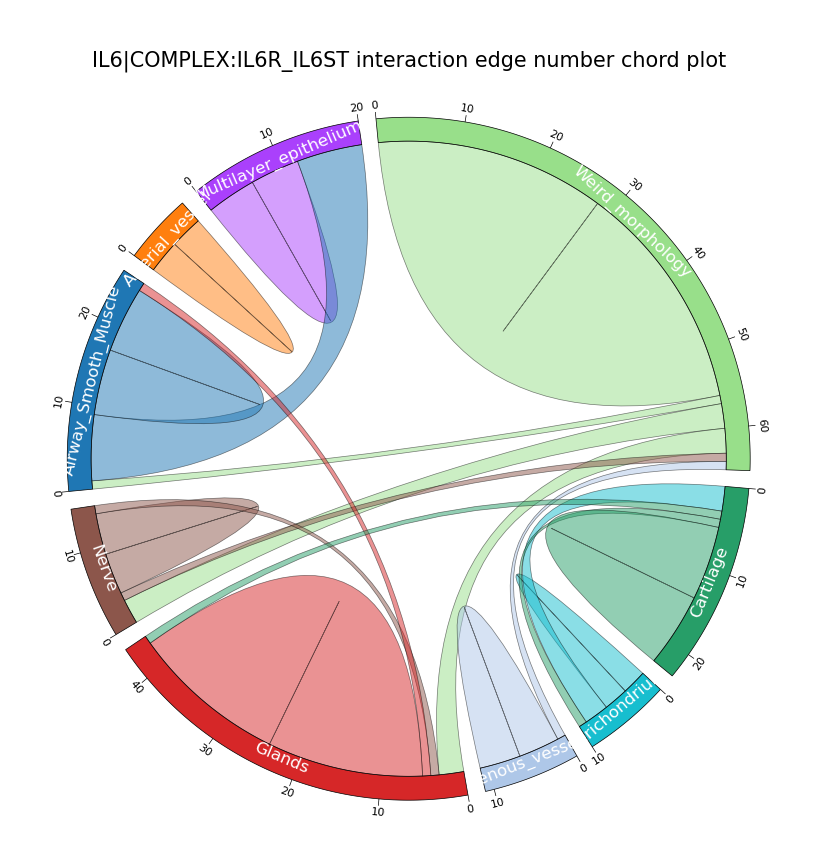

In [5]:
## Users can select the strength of a particular ligand receptor pair for visualization (level='IL6|COMPLEX:IL6R_IL6ST')
## The user can select the type of interaction strength as the number of edge (tp='edge_num')
st.pl.plot_CCI_chord(adata_311_stringent,
                       level='IL6|COMPLEX:IL6R_IL6ST',
                       tp='edge_num',
                       ct_list=cell_type_show,
                       ticks_interval=10
                    )

### C. Heatmap

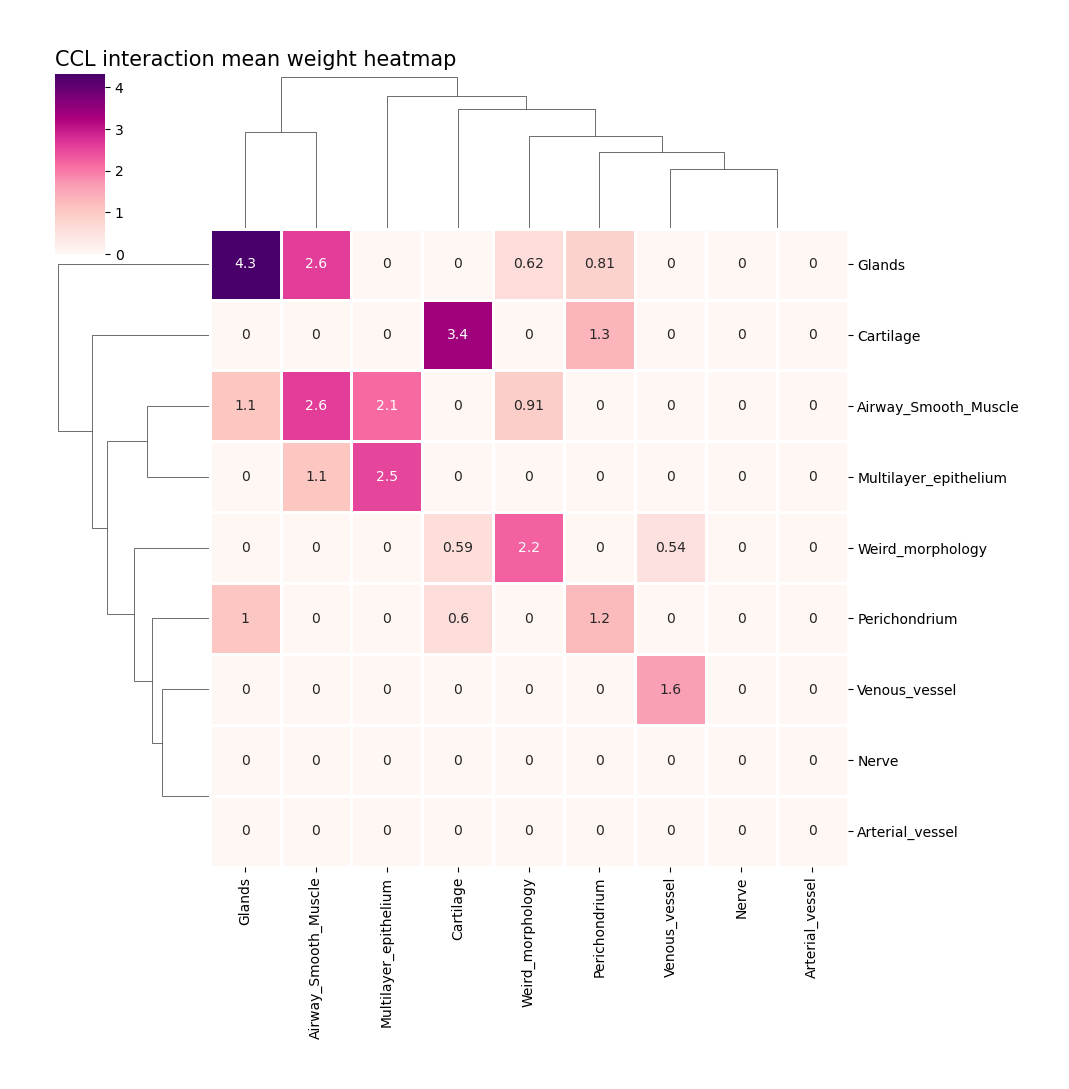

In [6]:
## Users can select the strength of a particular pathway for visualization (level='CCL')
## The user can select the type of interaction strength as the average score for each edge (tp='weight_per')
st.pl.plot_CCI_heatmap(adata_311_stringent,
                       level='CCL',
                       tp='weight_per',
                       ct_list=cell_type_show,
                      )

## (2) Ligand-receptor interaction

### A. Network plot

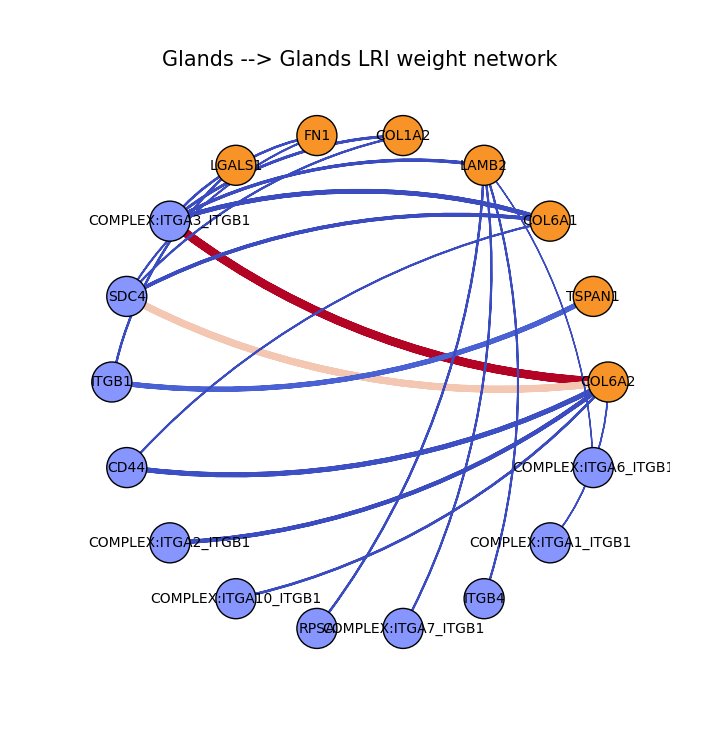

In [7]:
## Users need choose sender and reciever cell types (source='Glands', target='Glands')
## The user can select the number of LRPs with the highest score for visualization (top_n=20)
st.pl.plot_LRI_network(adata_311_stringent, 
                       source='Glands', 
                       target='Glands',
                       tp='weight',
                       node_size=40,
                       top_n=20)

### B. Chord plot

In [8]:
LR_list_show = [
 'HLA-DRA|CD4',
 'HLA-DRB5|CD4',
 'HLA-DOA|CD4',
 'TNFSF13|SDC2',
 'HLA-DMA|CD4',
 'IL6|COMPLEX:IL6R_IL6ST',
 'HLA-DQA1|CD4',
 'HLA-DRB1|CD4',
 'HLA-DMB|CD4',
 'HLA-DPA1|CD4',
 'TNFSF13|TNFRSF1A',
 'TNFSF13|TNFRSF17',
 'CCL13|CCR2',
 'CCL2|CCR2',
 'HLA-DQB1|CD4',
 'HLA-DPB1|CD4']

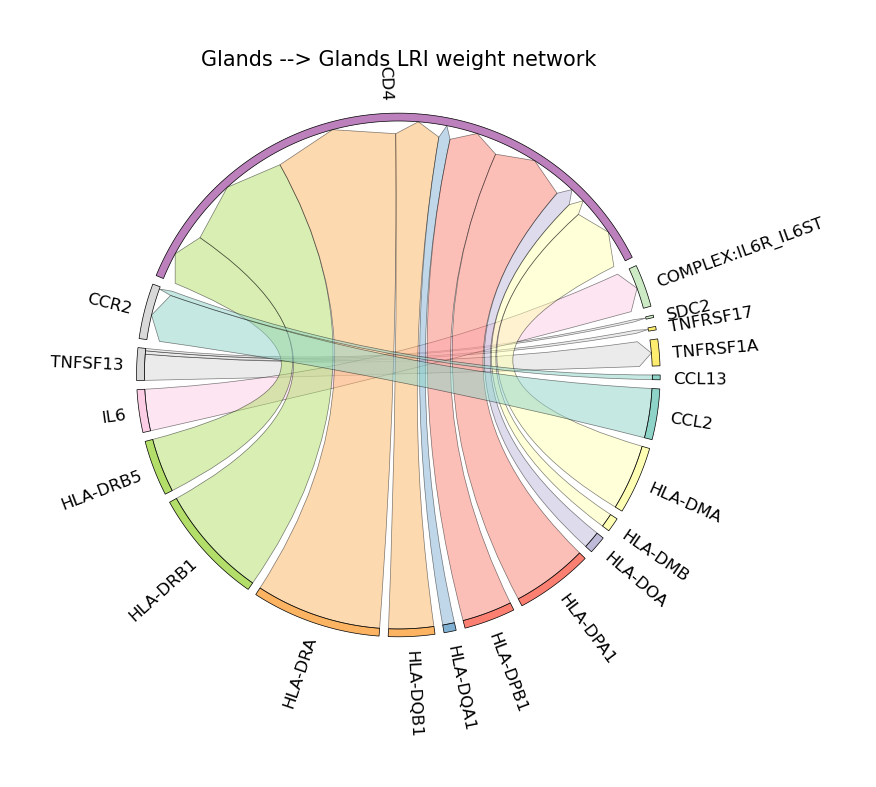

In [9]:
## The user can select the specified LRPs for visualization (lr_list=LR_list_show)
st.pl.plot_LRI_chord(adata_311_stringent, 
                     source='Glands', 
                     target='Glands', 
                     lr_list=LR_list_show)

### C. Dotplot

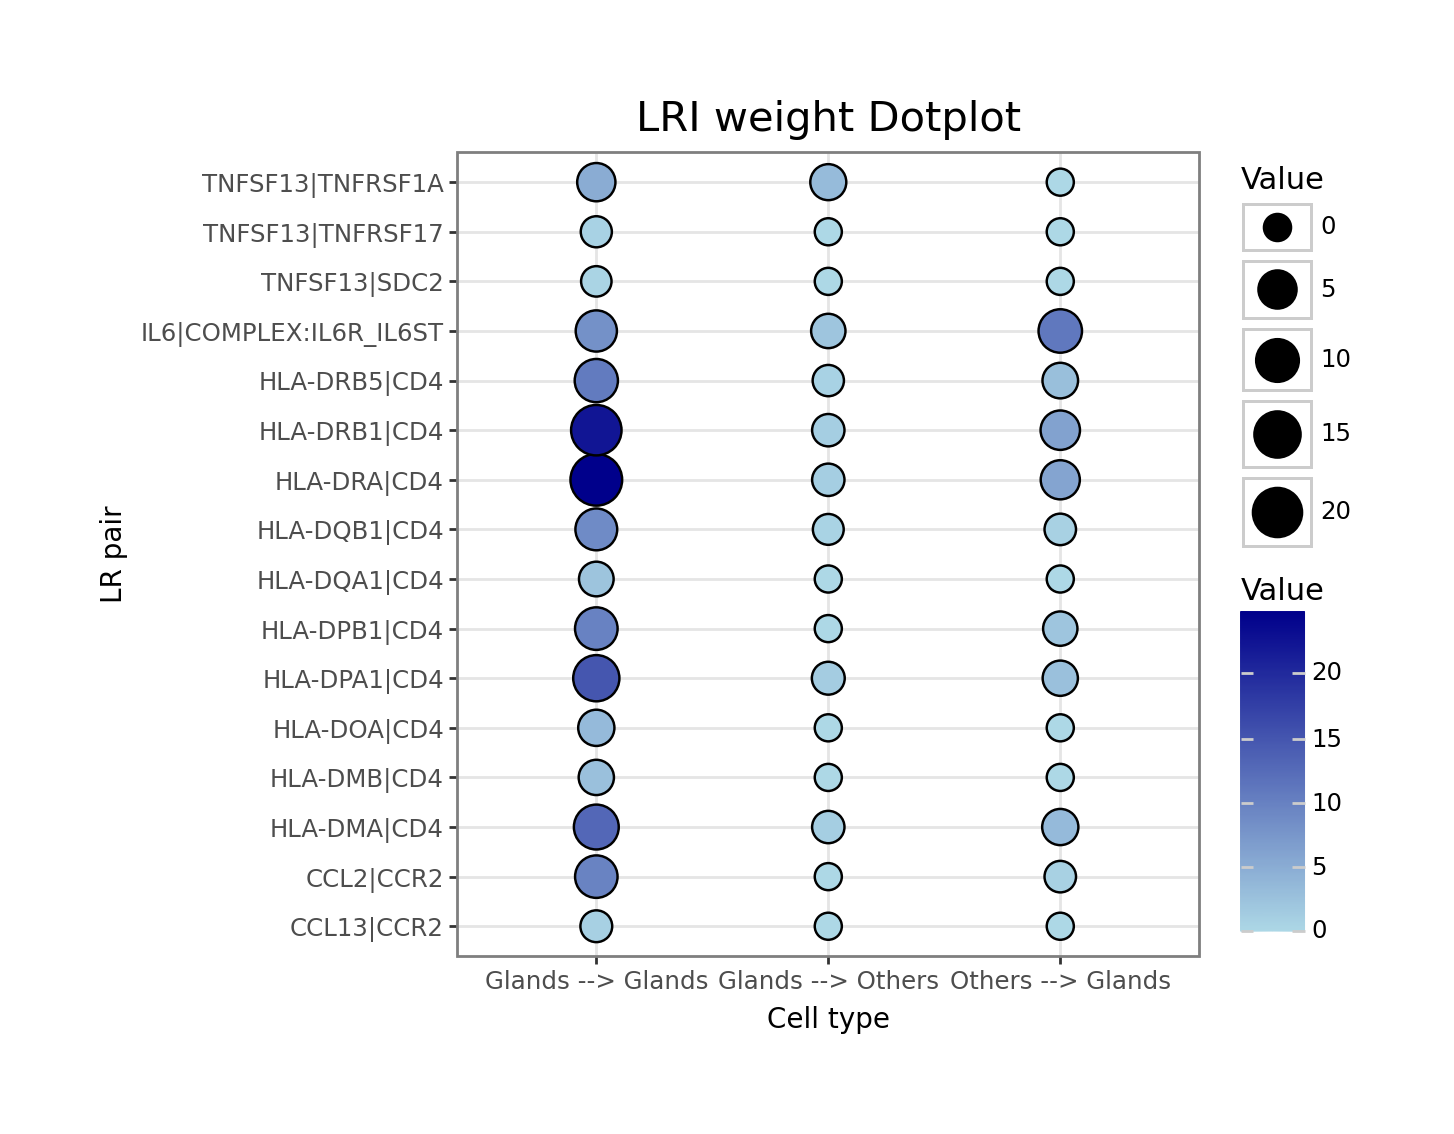

In [10]:
## The visualization of dotplot can specify sender and reciever cell type lists respectively.
## The length of the two lists needs to be the same, and the cell types in the same index position are visualized as a pair of cell types.
st.pl.plot_LRI_dotplot(adata_311_stringent,
                       source=['Glands','Glands','Others'],
                       target=['Glands','Others','Glands'],
                       lr_list=LR_list_show
                      )

## (3) Others

### A. Spatial radar plot

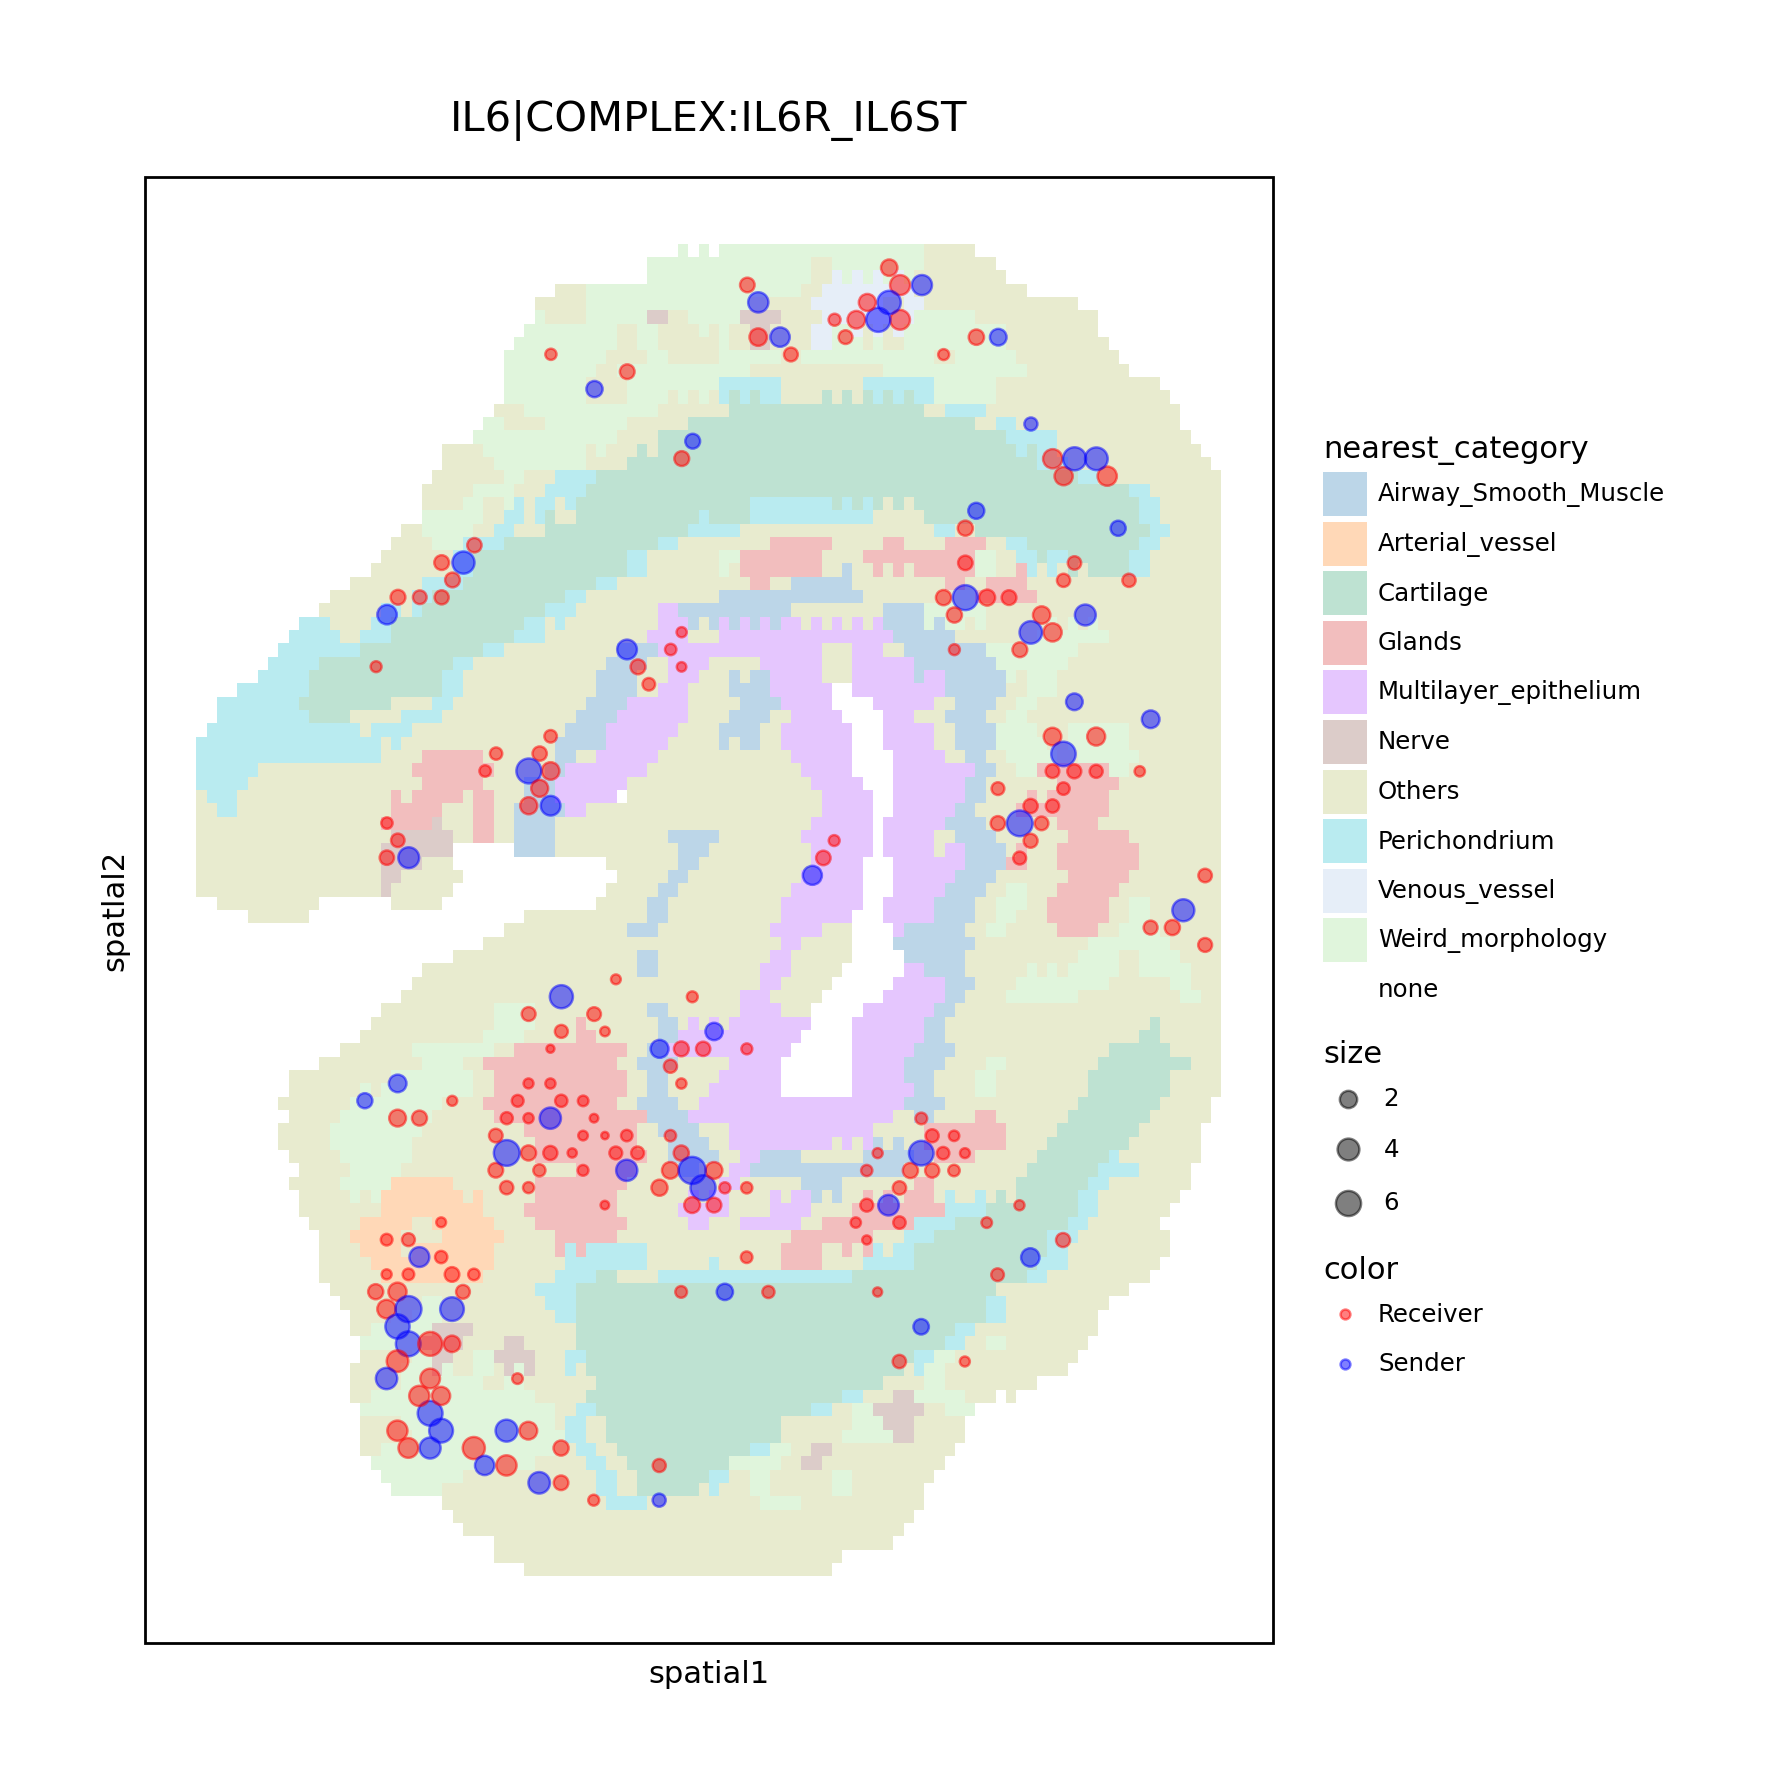

In [11]:
## Users can visualize where an LRP occurs in space (level='IL6|COMPLEX:IL6R_IL6ST')
## The user can select an annotation for the background (background_type='cell_type')
st.pl.plot_Community_spatial(adata_311_stringent, 
                           level='IL6|COMPLEX:IL6R_IL6ST',
                           background_type='cell_type')

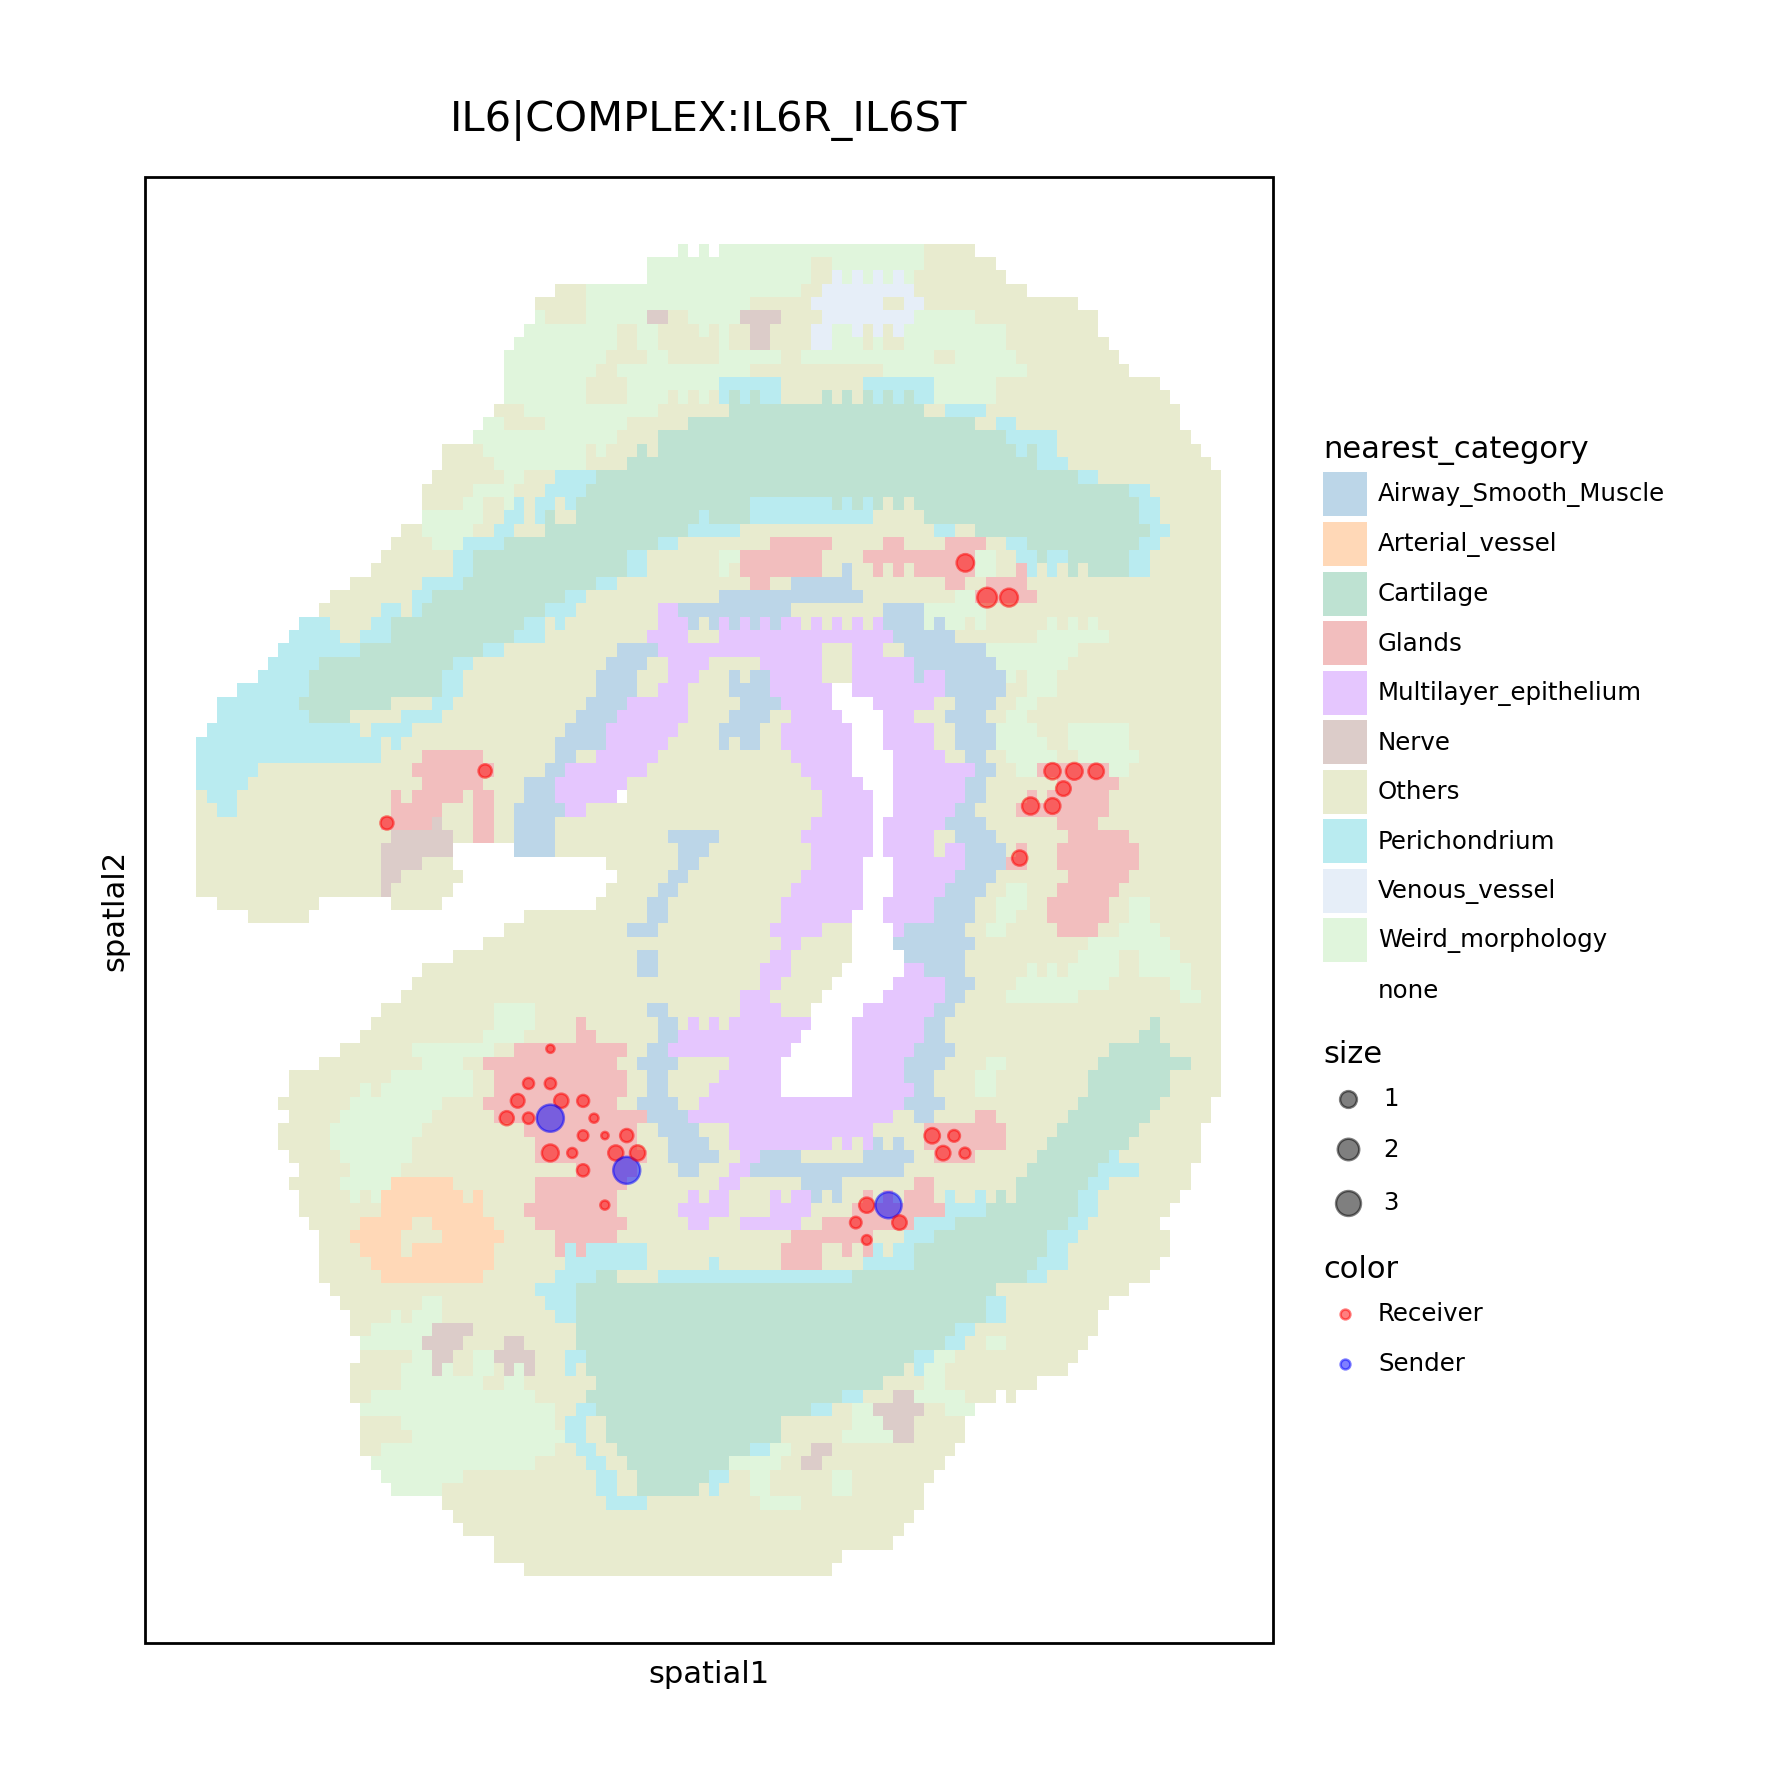

In [12]:
## Users can select an area for visualization (area='Glands')
st.pl.plot_Community_spatial(adata_311_stringent, 
                           level='IL6|COMPLEX:IL6R_IL6ST',
                           area='Glands',
                           background_type='cell_type')

/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/STACCI/pl.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/STACCI/pl.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/STACCI/pl.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

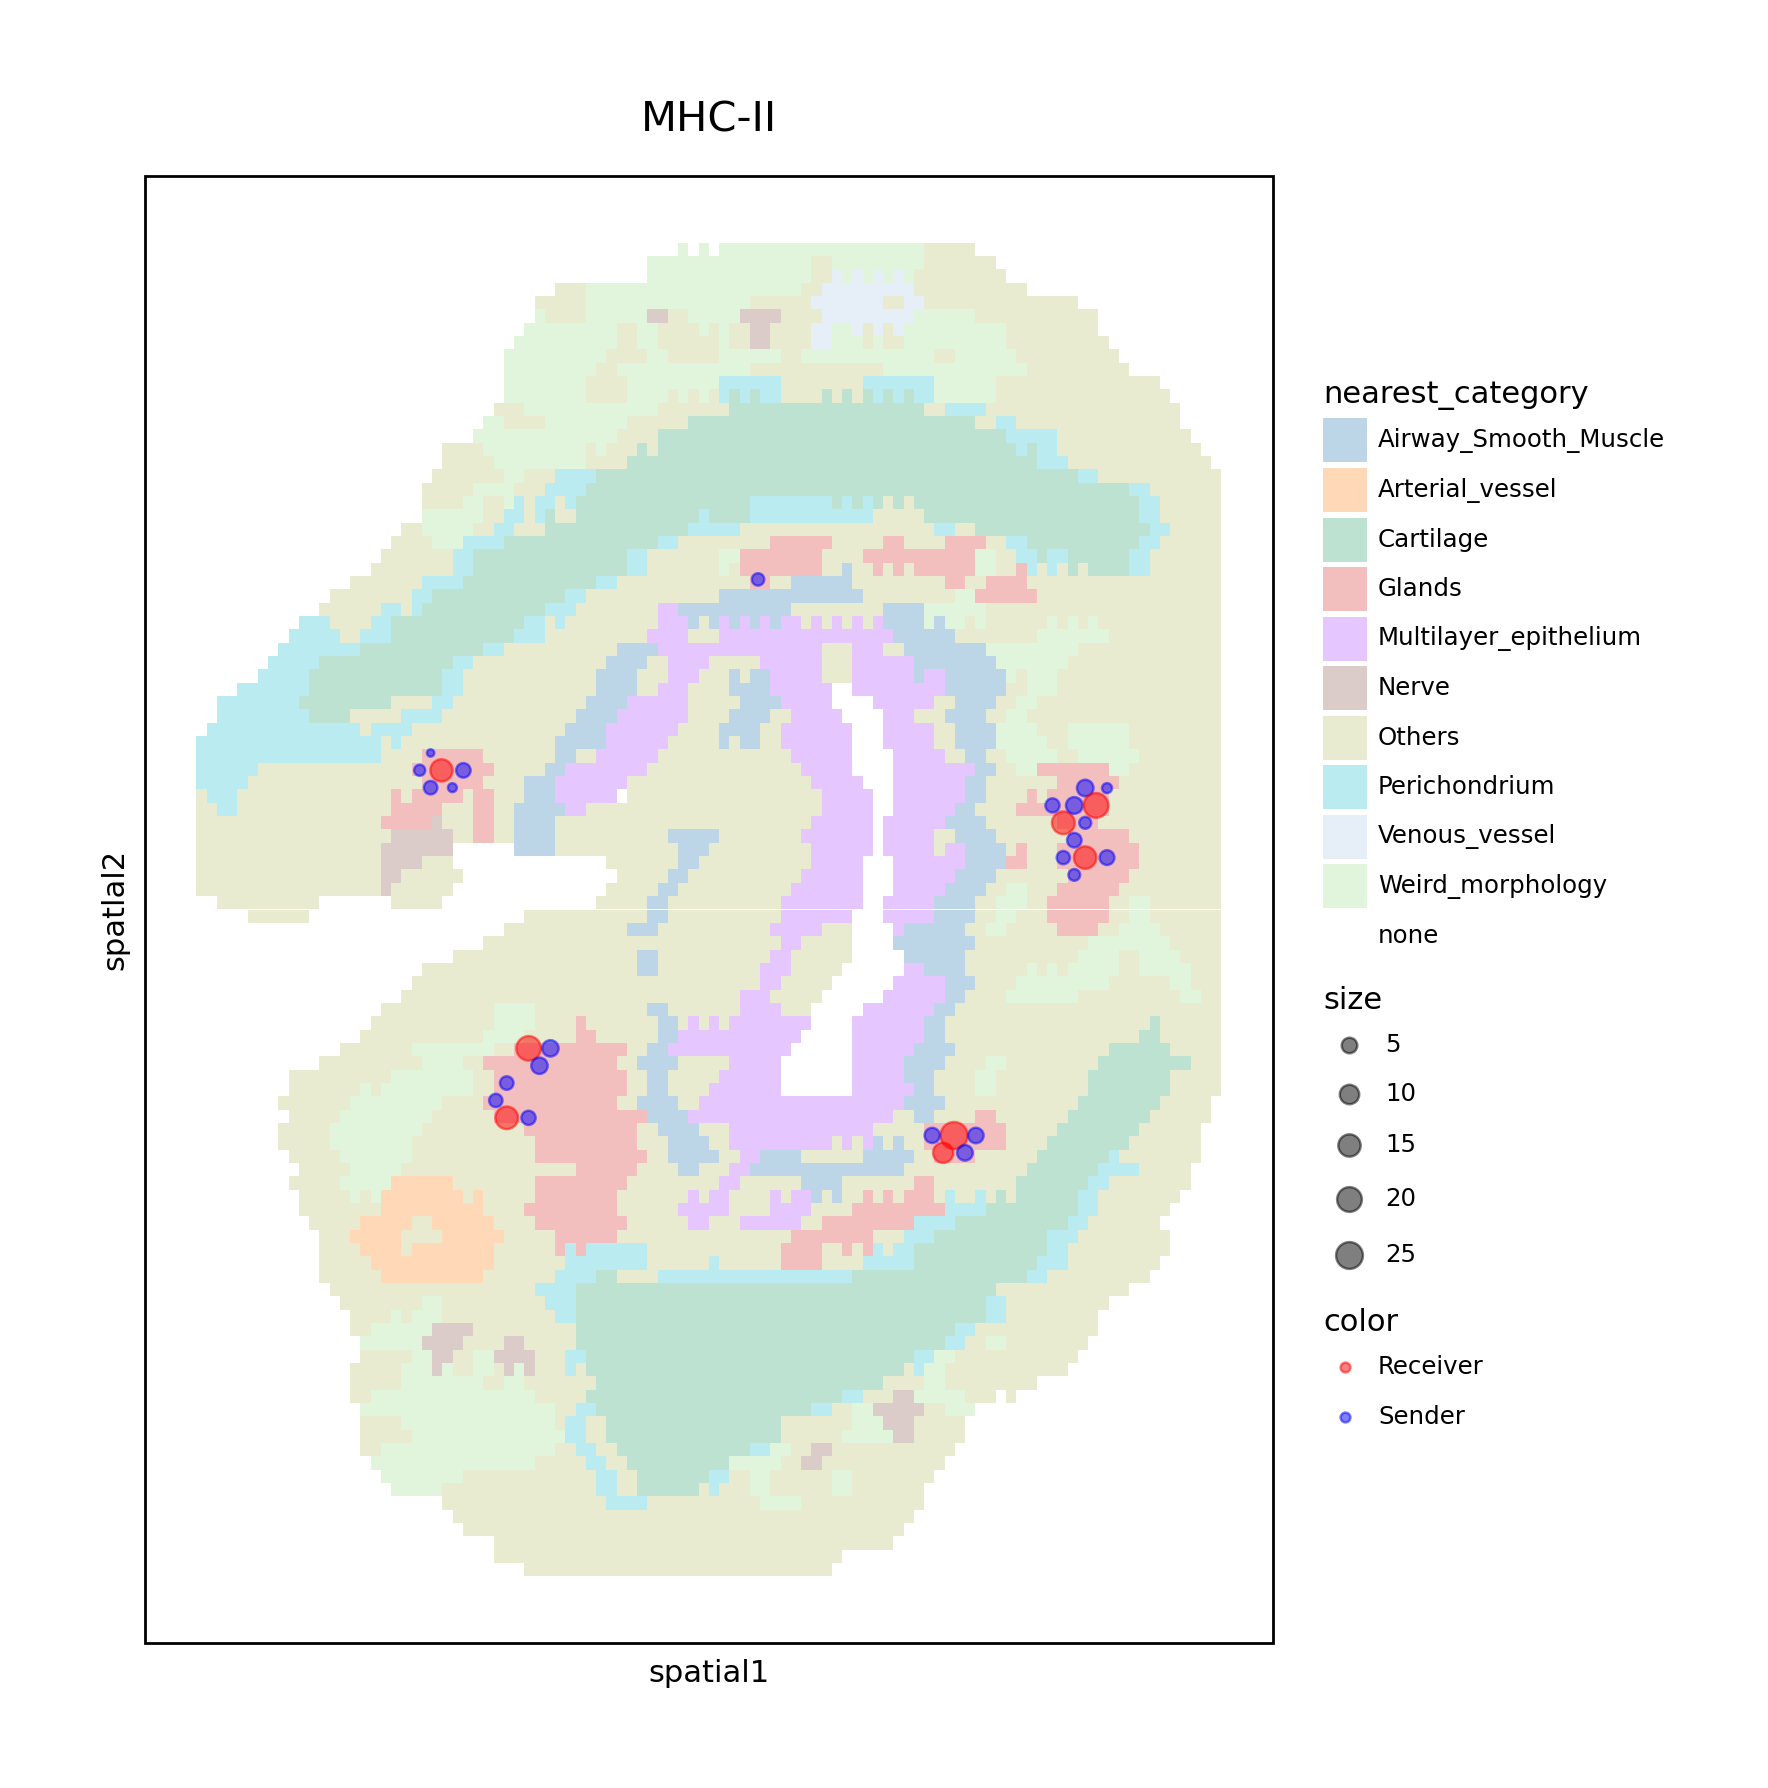

In [13]:
## Users can visualize where an pathway-level CCC occurs in space (level='MHC-II')
st.pl.plot_Community_spatial(adata_311_stringent, 
                           level='MHC-II',
                           area='Glands',
                           background_type='cell_type')

/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/STACCI/pl.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/STACCI/pl.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/STACCI/pl.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

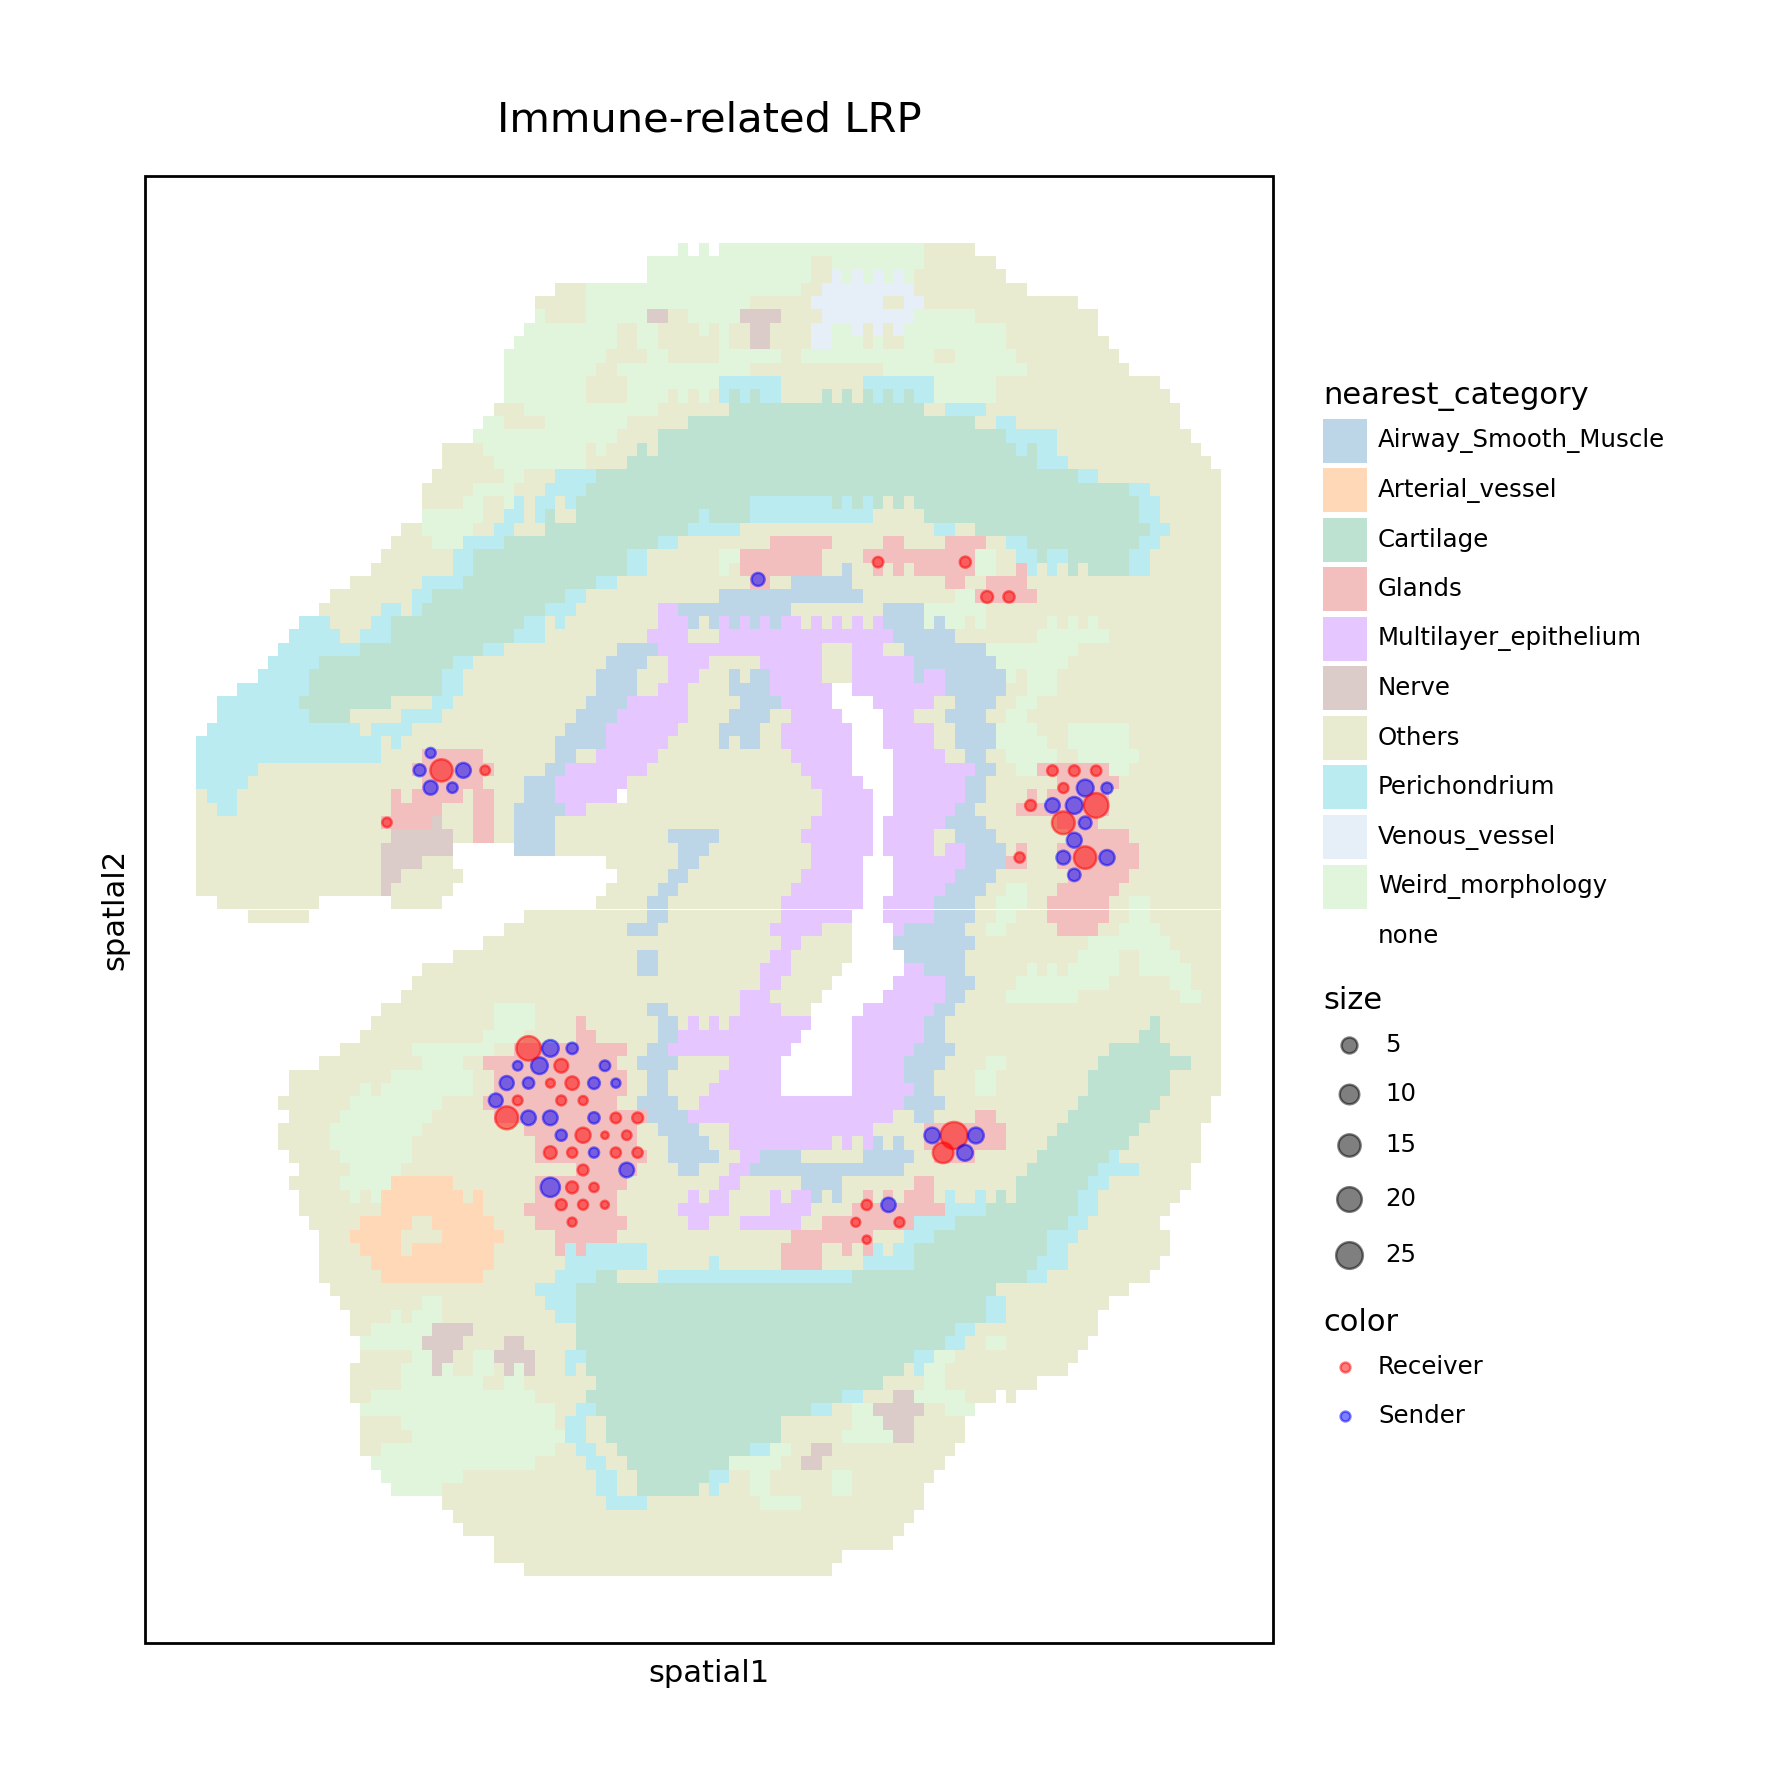

In [14]:
## The user can select the specified LRPs for visualization (level=LR_list_show)
st.pl.plot_Community_spatial(adata_311_stringent, 
                           level=LR_list_show,
                           area='Glands',
                           background_type='cell_type',
                           title='Immune-related LRP' 
                            )

### B. Distance network plot

The radius is: 220.41097976280582


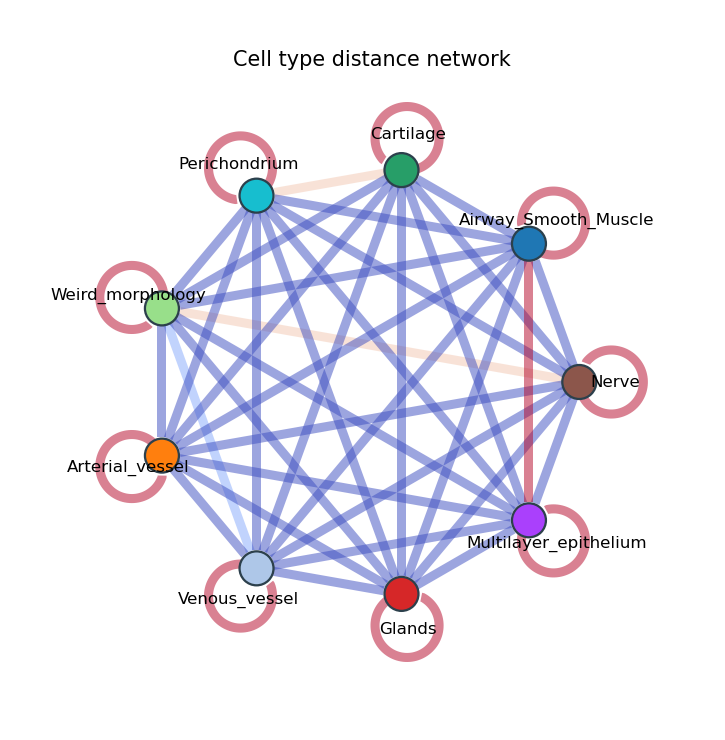

In [15]:
## Users can visualize the spatial distance between the two cell types (via the permutation test)
st.pl.plot_distance_network(adata_311_stringent,
                            ct_list=cell_type_show,
                            scope=6)

### C. Pathway enrichemnt

/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/user/BGM/qij/miniconda3/envs/stcase/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning


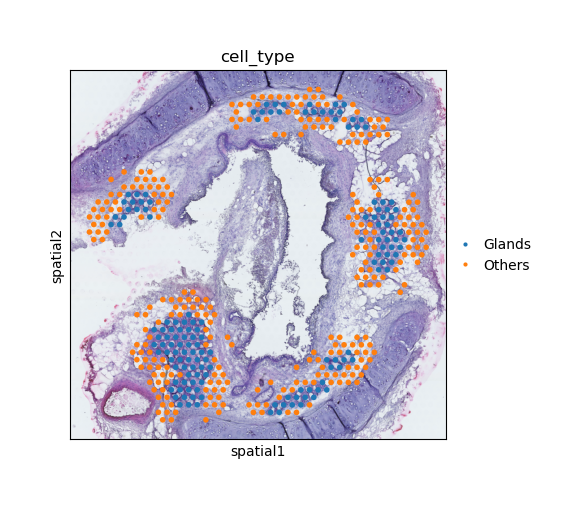

In [16]:
## Users can visualize the parts of spots/cells that interact between the two cell types
st.pl.plot_spatial(adata_311_stringent,
                     'Glands',
                     'Others')